In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import plotly.express as px

In [31]:
data = pd.read_csv(r"/1730285881-Airbnb_Open_Data.csv",low_memory=False)
df=pd.DataFrame(data)
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,19-10-2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,21-05-2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,05-07-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,19-11-2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13241 entries, 0 to 13240
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13241 non-null  int64  
 1   NAME                            13172 non-null  object 
 2   host id                         13241 non-null  int64  
 3   host_identity_verified          13146 non-null  object 
 4   host name                       13213 non-null  object 
 5   neighbourhood group             13214 non-null  object 
 6   neighbourhood                   13224 non-null  object 
 7   lat                             13232 non-null  float64
 8   long                            13232 non-null  float64
 9   country                         13190 non-null  object 
 10  country code                    13161 non-null  object 
 11  instant_bookable                13161 non-null  object 
 12  cancellation_policy             

In [33]:
df.duplicated().value_counts()

,count
False,13241


In [34]:
df.isna()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,True
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13236,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
13237,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,True
13238,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,True
13239,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [35]:
#drop all duplicated data
df.drop_duplicates(inplace=True)

In [65]:
# clean price_$ column
df['price_$'] = pd.to_numeric(
    df['price_$'].astype(str)
                 .str.replace('$','',regex=False)
                 .str.replace(',','',regex=False),
    errors='coerce'
)

# clean service_fee_$ (if you have it)
df['service_fee_$'] = pd.to_numeric(
    df['service_fee_$'].astype(str)
                      .str.replace('$','',regex=False)
                      .str.replace(',','',regex=False),
    errors='coerce'
)


In [41]:
#rename the price and service fee columns to include a dollar sign
df.rename(columns={'price':'price_$','service fee':'service_fee_$'},inplace=True)

In [42]:
#Drop all records with missing values
df.dropna(inplace=True)

In [43]:
# Strip column names
df.columns = df.columns.str.strip()

# Convert datatypes
df['price_$'] = df['price_$'].astype(float)
df['service_fee_$'] = df['service_fee_$'].astype(float)
df['id'] = df['id'].astype(str)
df['host_id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'], dayfirst=True)

# Only convert if column exists
if 'construction year' in df.columns:
    df['construction year'] = df['construction year'].astype(int)


In [44]:
#correcting spellings
df.loc[df['neighbourhood group'] == 'brookln', 'neighbourhood group'] = 'Brooklyn'
df.loc[df['neighbourhood group'] == 'manhatan', 'neighbourhood group'] = 'Manhattan'

In [45]:
#getting rid of outliners
df.drop(df[df['availability 365']>500].index)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,host_id
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,80014485718
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,52335172823
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,92037596077
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0,45498551794
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,1060.0,212.0,45.0,49.0,2017-10-05,0.40,5.0,1.0,219.0,90821839709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13232,8309370,"Huge Private Room, great location",41161752848,unconfirmed,Adrien,Manhattan,Midtown,40.75606,-73.97108,United States,...,1152.0,230.0,2.0,2.0,2016-02-15,0.05,3.0,2.0,331.0,41161752848
13233,8309922,Tribeca launchpad!,40748409825,unconfirmed,Franck,Manhattan,Tribeca,40.71854,-74.00439,United States,...,159.0,32.0,5.0,7.0,2019-04-29,0.56,1.0,1.0,101.0,40748409825
13235,8311027,"Bright, spacious BR in East Village",63270645653,unconfirmed,Katherine,Manhattan,East Village,40.72431,-73.98312,United States,...,863.0,173.0,1.0,1.0,2016-01-02,0.02,1.0,4.0,274.0,63270645653
13236,8311579,"Bright, brick BR in East Village",66540370660,unconfirmed,Katherine,Manhattan,East Village,40.72370,-73.98223,United States,...,101.0,20.0,1.0,2.0,2016-01-05,0.05,1.0,4.0,424.0,66540370660


In [46]:

df.duplicated().value_counts()

,count
False,10528


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10528 entries, 0 to 13239
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              10528 non-null  object        
 1   NAME                            10528 non-null  object        
 2   host id                         10528 non-null  int64         
 3   host_identity_verified          10528 non-null  object        
 4   host name                       10528 non-null  object        
 5   neighbourhood group             10528 non-null  object        
 6   neighbourhood                   10528 non-null  object        
 7   lat                             10528 non-null  float64       
 8   long                            10528 non-null  float64       
 9   country                         10528 non-null  object        
 10  country code                    10528 non-null  object        
 11  instant

In [17]:
#EXPLORATORY DATA ANALYSIS

In [48]:
df.describe()

,host id,lat,long,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.052800e+04,10528.000000,10528.000000,10528.000000,10528.000000,10528.000000,10528.000000,10528.000000,10528,10528.000000,10528.000000,10528.000000,10528.000000
mean,4.895902e+10,40.728808,-73.958050,2012.486417,619.060220,123.815350,7.453457,46.392382,2018-02-22 19:33:16.960486144,0.859335,3.005509,2.786759,208.270802
min,1.303496e+08,40.508680,-74.239860,2003.000000,50.000000,10.000000,-12.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,2.389041e+10,40.688367,-73.983473,2008.000000,323.000000,65.000000,2.000000,4.000000,2016-09-10 00:00:00,0.090000,2.000000,1.000000,98.000000
50%,4.852446e+10,40.722190,-73.958370,2012.000000,616.000000,123.000000,3.000000,16.000000,2018-12-31 00:00:00,0.320000,3.000000,1.000000,210.000000
75%,7.382657e+10,40.763773,-73.942090,2017.000000,910.000000,182.000000,5.000000,62.000000,2019-06-16 00:00:00,1.170000,4.000000,2.000000,317.000000
max,9.873673e+10,40.908040,-73.712990,2022.000000,1200.000000,240.000000,1250.000000,629.000000,2022-05-21 00:00:00,14.580000,5.000000,121.000000,426.000000
std,2.868018e+10,0.052402,0.036653,5.766061,335.591871,67.123571,24.060394,66.636085,NaN,1.185826,1.418294,8.252846,125.875425


In [49]:


#different property types in datasets
property_types=df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,6132
Private room,4258
Shared room,138


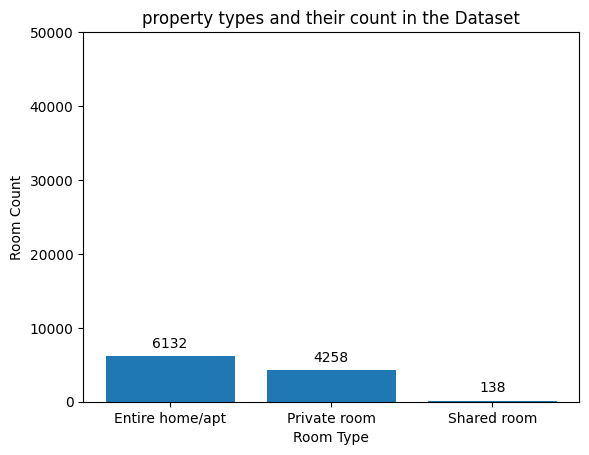

In [50]:
#room type count barplotted on a barchart
room_type_bar=plt.bar(property_types.index,property_types.loc[:,"count"]);
plt.bar_label(room_type_bar,labels=property_types.loc[:,"count"],padding=4);
plt.ylim([0,50000]);
plt.xlabel('Room Type');
plt.ylabel('Room Count');
plt.title('property types and their count in the Dataset');

In [51]:
hood_group=df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Manhattan,4804
Brooklyn,4708
Queens,828
Bronx,140
Staten Island,48


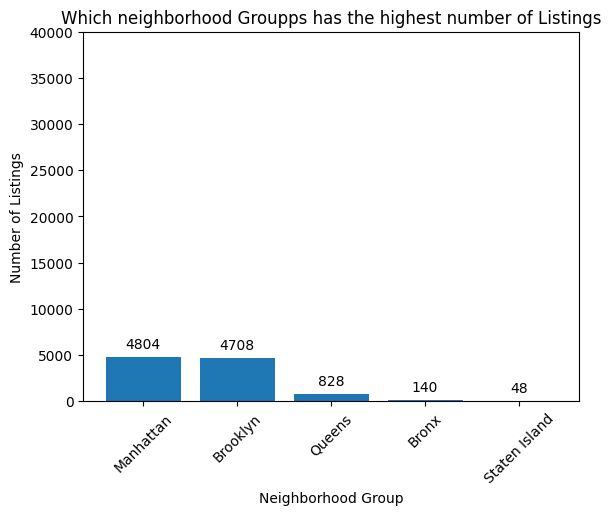

In [52]:
# Which neighborhood group has the highest number of listing ?
hood_group_bar=plt.bar(hood_group.index,hood_group.loc[:,"count"]);
plt.bar_label(hood_group_bar,labels=hood_group.loc[:,"count"],padding=4);
plt.ylim([0,40000]);
plt.xlabel('Neighborhood Group');
plt.ylabel('Number of Listings');
plt.xticks(rotation=45);
plt.title('Which neighborhood Groupps has the highest number of Listings');

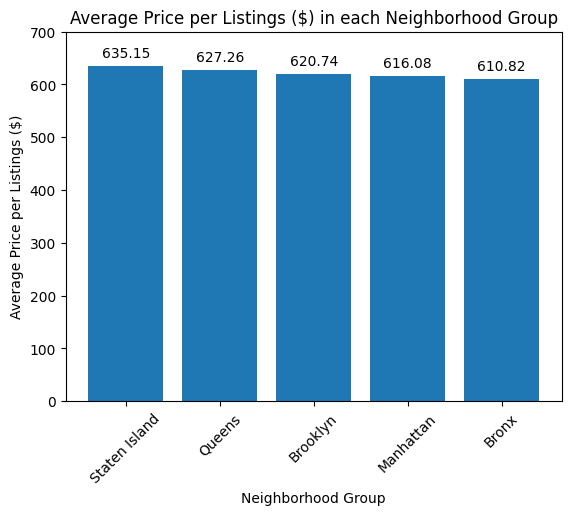

In [53]:
#Which neighborhoods group have the highest average prives for Airbnb listings?
avg_price=df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False).to_frame()
avg_price_bar=plt.bar(avg_price.index,avg_price.loc[:,"price_$"]);
plt.bar_label(avg_price_bar,labels=round(avg_price.loc[:,"price_$"],2),label_type='edge',padding=4);
plt.ylim(0,700);
plt.xlabel('Neighborhood Group');
plt.ylabel('Average Price per Listings ($)');
plt.xticks(rotation=45);
plt.title('Average Price per Listings ($) in each Neighborhood Group');

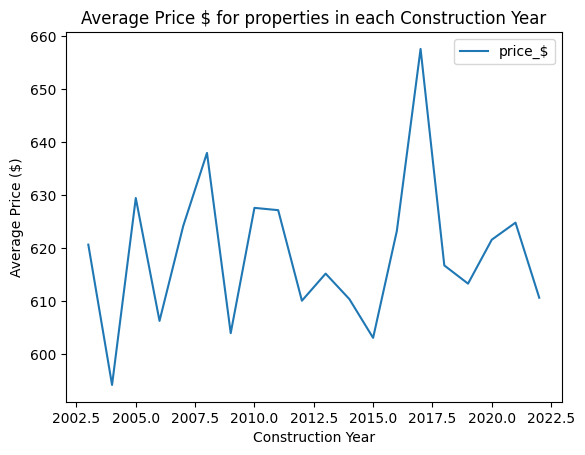

In [54]:
#is there a relationship between the construction year of property and price
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average Price ($)');
plt.title('Average Price $ for properties in each Construction Year');

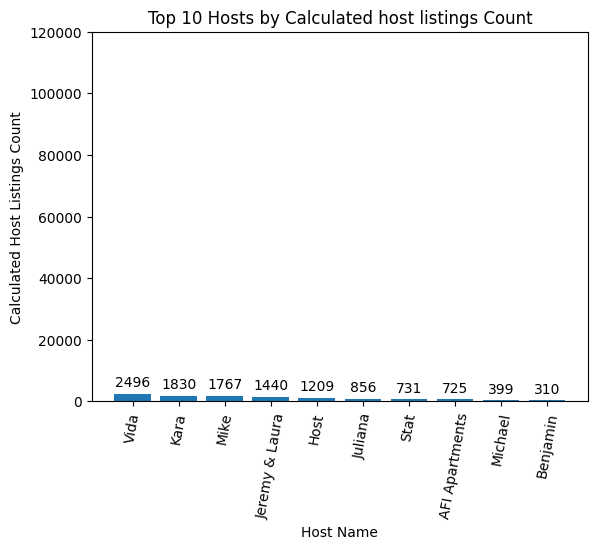

In [55]:
#who are the top 10 hosts by calculated host listing count?
hosts=df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).nlargest(10).to_frame()
hosts_bar=plt.bar(hosts.index,hosts.loc[:,"calculated host listings count"]);
plt.bar_label(hosts_bar,label=hosts.loc[:,"calculated host listings count"],label_type='edge',padding=3);
plt.xlabel('Host Name');
plt.ylabel('Calculated Host Listings Count');
plt.xticks(rotation=80);
plt.ylim([0,120000]);
plt.title('Top 10 Hosts by Calculated host listings Count');

In [56]:
#Are hosts with verified identities more likely verified to receive positive reviews?
review=df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending =False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.011464
unconfirmed,2.999622


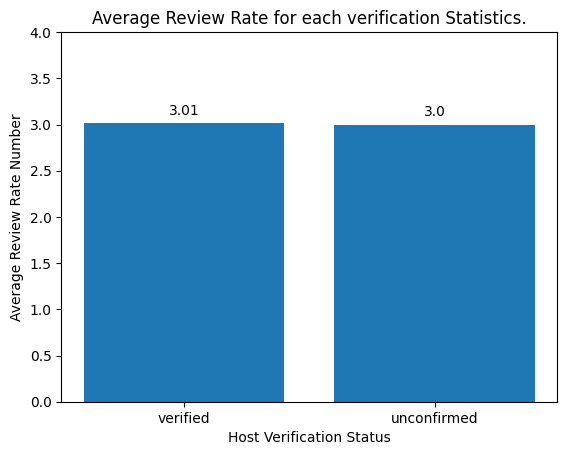

In [57]:
review_bar=plt.bar(review.index,review.loc[:,"review rate number"]);
plt.bar_label(review_bar,labels=round(review.loc[:,"review rate number"],2),padding=4);
plt.ylim([0,4]);
plt.xlabel('Host Verification Status');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate for each verification Statistics.');

In [58]:
#Is there a correlation between the price of a listing and its service fee ?
df['price_$'].corr(df['service_fee_$'])

np.float64(0.9999911787647814)

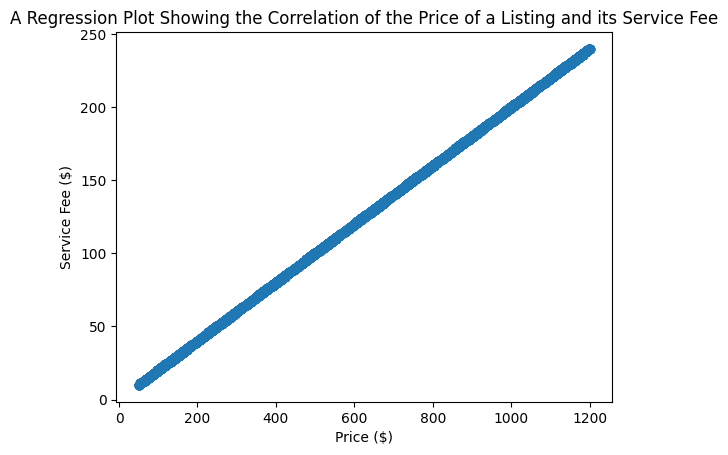

In [59]:
sns.regplot(df,x='price_$',y='service_fee_$');
plt.xlabel('Price ($)');
plt.ylabel('Service Fee ($)');
plt.title("A Regression Plot Showing the Correlation of the Price of a Listing and its Service Fee");

In [60]:
review=df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending =False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.011464
unconfirmed,2.999622


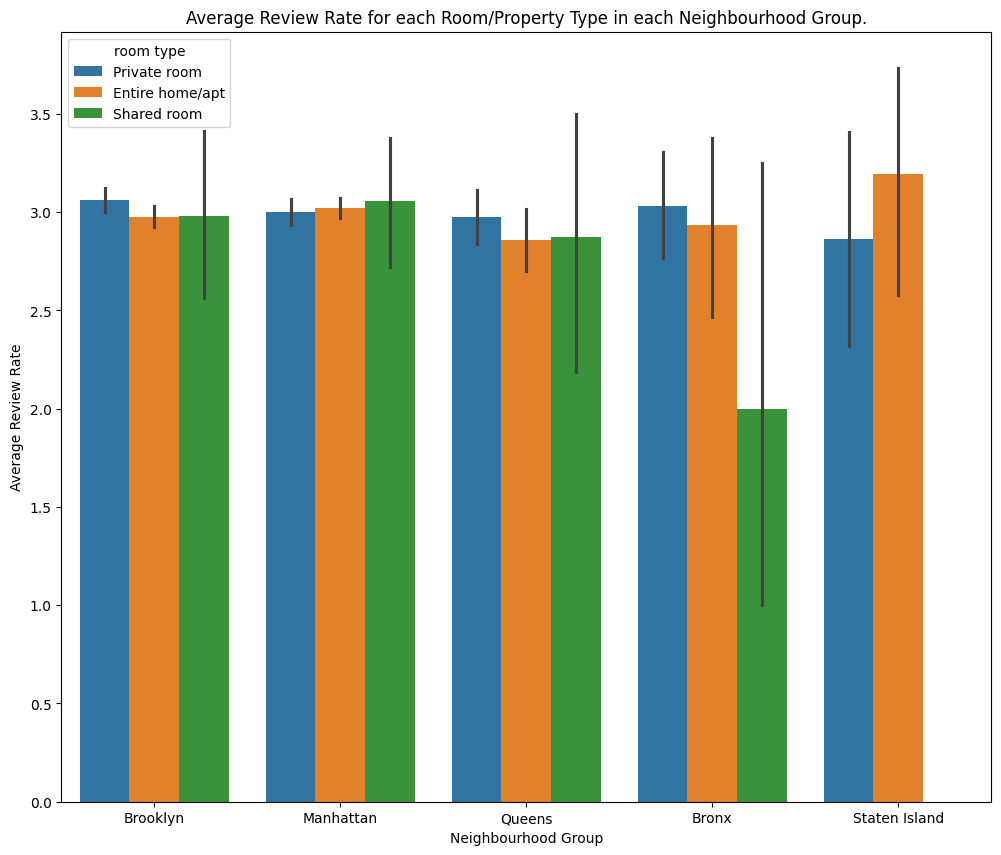

In [61]:
plt.figure(figsize=(12,10));
sns.barplot(data=df,x='neighbourhood group',y='review rate number',hue='room type');
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Review Rate');
plt.title('Average Review Rate for each Room/Property Type in each Neighbourhood Group.');

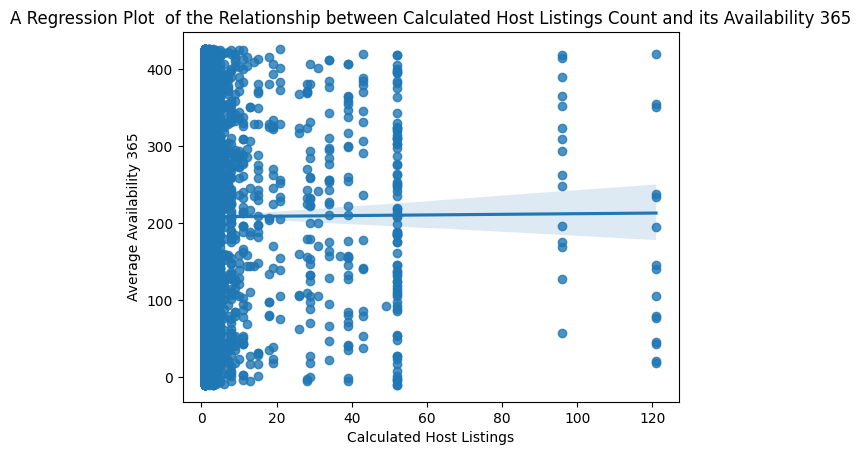

In [66]:
#Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?
sns.regplot(data=df,x='calculated host listings count',y='availability 365');
plt.xlabel('Calculated Host Listings');
plt.ylabel('Average Availability 365');
plt.title('A Regression Plot  of the Relationship between Calculated Host Listings Count and its Availability 365');

In [67]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.00263620714283176)

In [68]:
#Conclusion

In [ ]:
'''In conclusion we can say that this study provided us to think about customers or clients mostly matters the room type privacy and verified hosts attracts clients to make them stay for maore days